## 6.1.4 - Generate Random Latitudes and Longitudes

### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### 6.1.5 - Generate Random World Cities

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.        
len(cities)

596

## 6.2.1 - Understanding APIs

In [ ]:
# created an account on openweather.org and generated API key in config.py

## 6.2.6 - Get the City Weather Data

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}" )
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | eureka
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | havoysund
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | dabat
Processing Record 10 of Set 1 | sorland
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | salalah
Processing Record 23 of Set 1 |

Processing Record 190 of Set 4 | panjakent
Processing Record 191 of Set 4 | rab
City not found. Skipping...
Processing Record 192 of Set 4 | aksarka
Processing Record 193 of Set 4 | barstow
Processing Record 194 of Set 4 | boende
Processing Record 195 of Set 4 | dikson
Processing Record 196 of Set 4 | mitsamiouli
Processing Record 197 of Set 4 | yar-sale
Processing Record 198 of Set 4 | tamboril
Processing Record 199 of Set 4 | fort nelson
Processing Record 200 of Set 4 | cahul
Processing Record 201 of Set 4 | foldes
Processing Record 202 of Set 4 | muscle shoals
Processing Record 203 of Set 4 | ilulissat
Processing Record 205 of Set 5 | mecca
Processing Record 206 of Set 5 | chuy
Processing Record 207 of Set 5 | leshan
Processing Record 208 of Set 5 | diu
Processing Record 209 of Set 5 | gat
Processing Record 210 of Set 5 | uitenhage
Processing Record 211 of Set 5 | lagoa
Processing Record 212 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 213 of Set 5 | las

Processing Record 376 of Set 8 | llangefni
Processing Record 377 of Set 8 | kui buri
Processing Record 378 of Set 8 | nuuk
Processing Record 379 of Set 8 | slave lake
Processing Record 380 of Set 8 | wagga wagga
Processing Record 381 of Set 8 | oktyabrskoye
Processing Record 382 of Set 8 | sevierville
Processing Record 383 of Set 8 | morant bay
Processing Record 384 of Set 8 | samarai
Processing Record 385 of Set 8 | acajutla
Processing Record 386 of Set 8 | gombong
Processing Record 387 of Set 8 | vao
Processing Record 388 of Set 8 | isangel
Processing Record 389 of Set 8 | kortkeros
Processing Record 390 of Set 8 | sosua
Processing Record 391 of Set 8 | suoyarvi
Processing Record 392 of Set 8 | tura
Processing Record 393 of Set 8 | karaul
City not found. Skipping...
Processing Record 394 of Set 8 | longyearbyen
Processing Record 395 of Set 8 | kibala
Processing Record 396 of Set 8 | zelenoborsk
Processing Record 397 of Set 8 | champerico
Processing Record 398 of Set 8 | ken caryl
Pro

Processing Record 563 of Set 12 | toora-khem
Processing Record 564 of Set 12 | coffeyville
City not found. Skipping...
Processing Record 565 of Set 12 | belyy yar
Processing Record 566 of Set 12 | taitung
Processing Record 567 of Set 12 | shamgarh
Processing Record 568 of Set 12 | las vegas
Processing Record 569 of Set 12 | avera
Processing Record 570 of Set 12 | kungurtug
Processing Record 571 of Set 12 | comodoro rivadavia
Processing Record 572 of Set 12 | lerwick
Processing Record 573 of Set 12 | tiznit
Processing Record 574 of Set 12 | uddevalla
Processing Record 575 of Set 12 | khani
Processing Record 576 of Set 12 | yanan
City not found. Skipping...
Processing Record 577 of Set 12 | hualmay
Processing Record 578 of Set 12 | samusu
City not found. Skipping...
Processing Record 579 of Set 12 | barinas
Processing Record 580 of Set 12 | churachandpur
Processing Record 581 of Set 12 | vestmanna
Processing Record 582 of Set 12 | hinatuan
Processing Record 583 of Set 12 | marienburg
Pro

## 6.2.7 - Create a DataFrame of City Weather Data

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,60.80,44,40,27.63,CL,2021-01-23 21:26:29
1,Eureka,40.8021,-124.1637,55.99,70,0,10.00,US,2021-01-23 21:28:54
2,Ponta Do Sol,32.6667,-17.1000,60.01,78,100,1.99,PT,2021-01-23 21:28:54
3,Laguna,38.4210,-121.4238,55.00,71,40,6.91,US,2021-01-23 21:28:55
4,New Norfolk,-42.7826,147.0587,64.99,71,4,1.01,AU,2021-01-23 21:28:55
5,East London,-33.0153,27.9116,75.47,79,71,22.35,ZA,2021-01-23 21:27:16
6,Havoysund,70.9963,24.6622,14.00,79,90,17.27,NO,2021-01-23 21:28:56
7,Busselton,-33.6500,115.3333,62.01,88,45,4.76,AU,2021-01-23 21:28:56
8,Dabat,12.9842,37.7650,50.76,89,1,4.07,ET,2021-01-23 21:28:57
9,Sorland,67.6670,12.6934,26.11,92,78,11.61,NO,2021-01-23 21:28:57


In [12]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-01-23 21:26:29,-53.1500,-70.9167,60.80,44,40,27.63
1,Eureka,US,2021-01-23 21:28:54,40.8021,-124.1637,55.99,70,0,10.00
2,Ponta Do Sol,PT,2021-01-23 21:28:54,32.6667,-17.1000,60.01,78,100,1.99
3,Laguna,US,2021-01-23 21:28:55,38.4210,-121.4238,55.00,71,40,6.91
4,New Norfolk,AU,2021-01-23 21:28:55,-42.7826,147.0587,64.99,71,4,1.01
5,East London,ZA,2021-01-23 21:27:16,-33.0153,27.9116,75.47,79,71,22.35
6,Havoysund,NO,2021-01-23 21:28:56,70.9963,24.6622,14.00,79,90,17.27
7,Busselton,AU,2021-01-23 21:28:56,-33.6500,115.3333,62.01,88,45,4.76
8,Dabat,ET,2021-01-23 21:28:57,12.9842,37.7650,50.76,89,1,4.07
9,Sorland,NO,2021-01-23 21:28:57,67.6670,12.6934,26.11,92,78,11.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

## 6.3.1 - Plot Latitude vs. Temperature

### Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

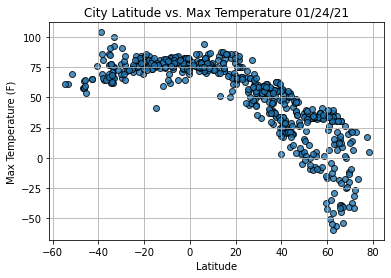

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths = 1, marker="o",
            alpha = 0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## 6.3.2 - Plot Latitude vs. Humidity

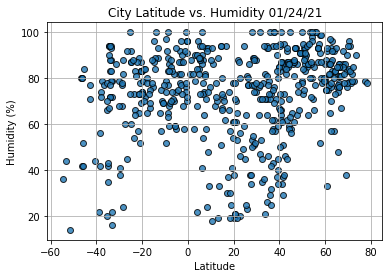

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## 6.3.3 - Plot Latitude vs. Cloudiness

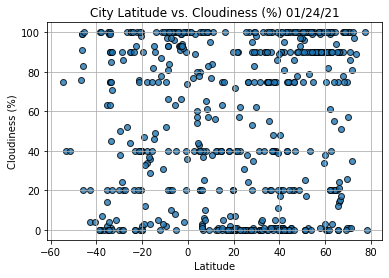

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## 6.3.4 - Plot Latitude vs. Wind Speed

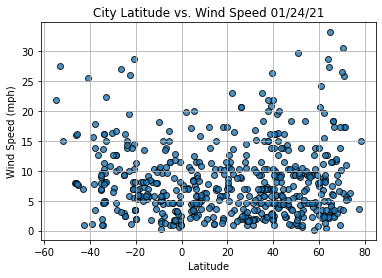

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## 6.4.2 - Find the Correlation Between Latitude and Maximum Temperature

### Create a Linear Regression Function

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrames

In [46]:
index13 = city_data_df.loc[13]
index13

City                   Codrington
Country                        AU
Date          2021-01-23 21:28:59
Lat                      -38.2667
Lng                       141.967
Max Temp                    69.13
Humidity                       56
Cloudiness                    100
Wind Speed                   7.87
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
541     True
542    False
543    False
544    False
545    False
Name: Lat, Length: 546, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Eureka,US,2021-01-23 21:28:54,40.8021,-124.1637,55.99,70,0,10.00
2,Ponta Do Sol,PT,2021-01-23 21:28:54,32.6667,-17.1000,60.01,78,100,1.99
3,Laguna,US,2021-01-23 21:28:55,38.4210,-121.4238,55.00,71,40,6.91
6,Havoysund,NO,2021-01-23 21:28:56,70.9963,24.6622,14.00,79,90,17.27
8,Dabat,ET,2021-01-23 21:28:57,12.9842,37.7650,50.76,89,1,4.07


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

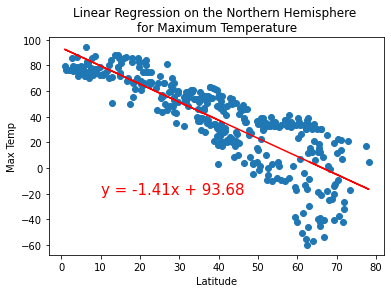

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,-20))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

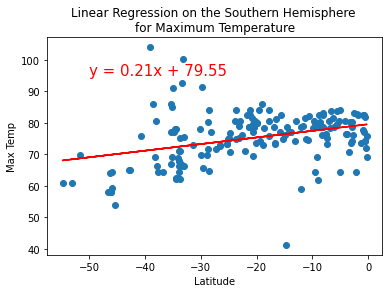

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,95))

## 6.4.3 - Find the Correlation Between Latitude and Percent Humidity

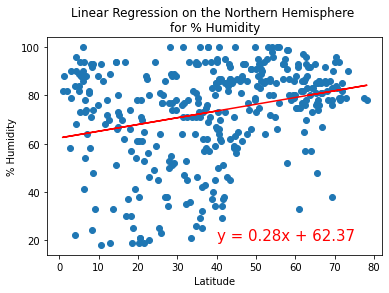

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,20))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

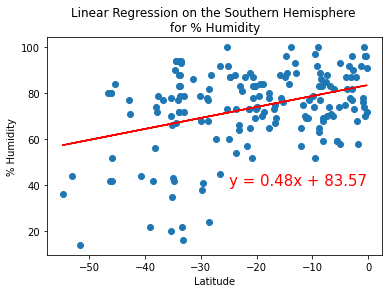

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-25,40))

## 6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

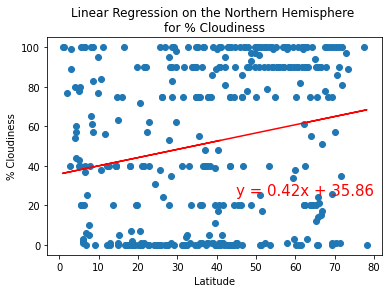

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,25))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

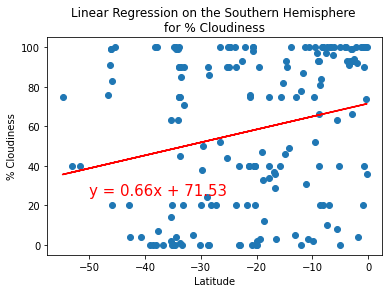

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,25))

## 6.4.5 - Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

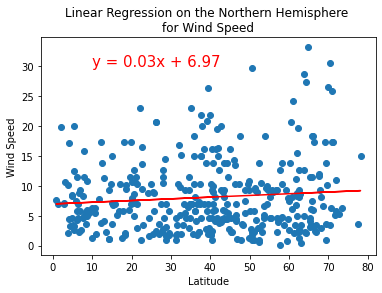

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,30))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

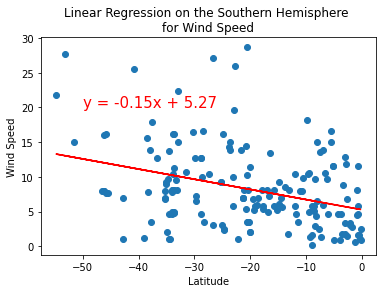

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))

## 6.5.1 - Set Up Google Maps and Places API

## 6.5.2 - Create Heatmaps for Weather Parameters